In [1]:

import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from fredapi import Fred
from dataset import Dataset
import gtab
#sci-kit imports
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR
import sklearn.preprocessing
import sklearn.model_selection
import sklearn.pipeline
from visualizations import Visualizer
np.random.seed(42)

In [2]:
#controling whether tensorflow does recognize my GPU
tf.config.get_visible_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = Dataset.get_btc_data()

In [4]:
data = data.loc["2014-9-17":]

In [5]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,NaN,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [6]:
{col: [data[col].isnull().sum(), f'% {np.round(np.mean(data[col].isnull()*100), 3)}'
      ] for col in data.columns if data[col].isnull().any()}

{'BTC / Capitalization, market, estimated supply, USD': [1739, '% 57.45'],
 'Wiki_btc_search': [287, '% 9.481'],
 'Close_^DJI': [939, '% 31.021'],
 'Close_^GSPC': [939, '% 31.021'],
 'Close_GC=F': [942, '% 31.12'],
 'Close_^VIX': [939, '% 31.021'],
 'Close_^IXIC': [939, '% 31.021'],
 'Close_SMH': [939, '% 31.021'],
 'Close_VGT': [939, '% 31.021'],
 'Close_XSD': [939, '% 31.021'],
 'Close_IYW': [939, '% 31.021'],
 'Close_FTEC': [939, '% 31.021'],
 'Close_IGV': [939, '% 31.021'],
 'Close_QQQ': [939, '% 31.021'],
 'Wiki_crypto_search': [287, '% 9.481'],
 'USD_EUR_rate': [122, '% 4.03']}

In [7]:

data['Wiki_crypto_search'] = data['Wiki_crypto_search'].fillna(0)
data['Wiki_btc_search'] = data['Wiki_btc_search'].fillna(0)
#to be changed
data["BTC / Capitalization, market, estimated supply, USD"] = data["BTC / Capitalization, market, estimated supply, USD"].fillna(0)

In [8]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,457.334015
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,424.440002
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,394.795990
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,408.903992
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,NaN,NaN,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,398.821014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,787672.0,71.420128,52.225802,190.545333,139.335829,1.683094e+08,1.959590e+08,1.348707,0.530874,306349.750545,...,NaN,NaN,26.035326,3483.0,21989.981,65799.0,6.516674,21428.3,NaN,16919.804688
2022-12-27,867369.0,71.311728,52.133758,146.054319,106.775712,2.861220e+08,2.541181e+08,1.629313,0.663281,393800.336021,...,251.721115,261.771362,26.035326,3747.0,21989.981,65799.0,6.516674,21428.3,1.0654,16717.173828
2022-12-28,904203.0,71.677896,52.380487,111.280678,81.321250,2.809234e+08,3.321595e+08,1.261058,0.607543,340456.769181,...,248.961319,258.315247,26.035326,4060.0,21989.981,65799.0,6.516674,21428.3,1.0622,16552.572266
2022-12-29,945186.0,73.206816,53.482266,106.721323,77.966758,2.713737e+08,3.133503e+08,1.263260,0.550805,337268.899500,...,256.320770,264.611725,26.035326,4064.0,21989.981,65799.0,6.516674,21428.3,1.0668,16642.341797


In [9]:
data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']] = data[['Close_^DJI','Close_^GSPC','Close_GC=F','Close_^VIX','Close_^IXIC',
    'Close_SMH','Close_VGT','Close_XSD','Close_IYW','Close_FTEC','Close_IGV',
    'Close_QQQ','USD_EUR_rate']].ffill()
data["BTC-USD"] = data["BTC-USD"].shift(-10)
data = data.dropna()

In [10]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,399.519989
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,377.181000
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,375.467010
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,386.944000
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,383.614990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,893040.0,63.638479,46.708248,92.241011,67.701429,3.249423e+08,5.647839e+08,1.104805,0.457664,285957.077723,...,257.900665,271.717651,26.035326,4349.0,21989.981,65799.0,6.516674,21438.7,1.0610,16919.804688
2022-12-17,967830.0,64.715648,47.484694,152.352954,111.788007,2.299792e+08,3.900930e+08,1.077419,0.459618,281394.393781,...,257.900665,271.717651,26.035326,4093.0,21989.981,65799.0,6.516674,21438.7,1.0610,16717.173828
2022-12-18,783263.0,65.484320,48.038009,200.559814,147.126736,1.658453e+08,1.982145e+08,0.905575,0.376875,188281.093604,...,257.900665,271.717651,26.035326,4594.0,21989.981,65799.0,6.516674,21438.7,1.0610,16552.572266
2022-12-19,971140.0,65.030832,47.686621,100.344436,73.581821,3.266879e+08,3.518762e+08,1.154616,0.445258,302527.709863,...,254.090927,267.899017,26.035326,4774.0,21989.981,65799.0,6.516674,21453.1,1.0624,16642.341797


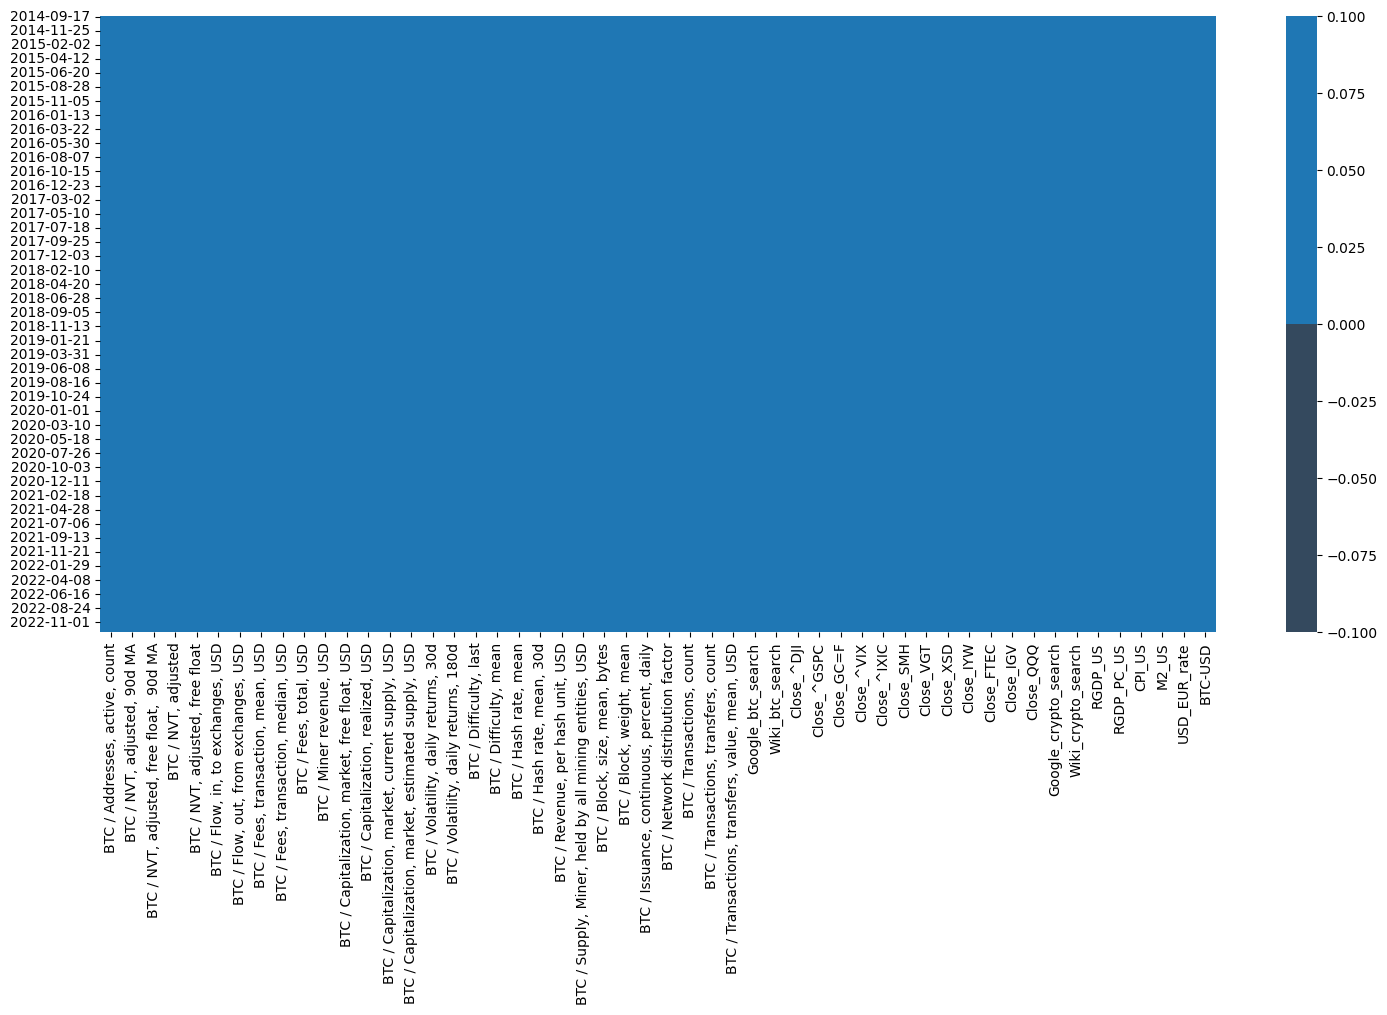

In [11]:
fig = Visualizer.draw_missing_data(data)
fig.show()

In [12]:
data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate,BTC-USD
2014-09-17,191063.0,82.176970,76.651156,103.567097,96.602951,1.065752e+07,9.743524e+06,0.069971,0.045634,5494.516757,...,85.737656,92.093697,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2958,399.519989
2014-09-18,190890.0,76.826435,71.646822,75.335079,70.256013,1.696480e+07,1.359548e+07,0.068289,0.042688,5214.342615,...,86.452225,92.787651,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2913,377.181000
2014-09-19,172255.0,70.675713,65.897688,53.588317,49.965484,1.770344e+07,1.694158e+07,0.060801,0.039389,4261.732292,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,375.467010
2014-09-20,169941.0,73.687502,68.691994,74.395015,69.351542,9.387692e+06,8.728492e+06,0.066003,0.041104,4235.264753,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,386.944000
2014-09-21,200712.0,72.300627,67.387059,97.596787,90.964085,1.050540e+07,1.089809e+07,0.063093,0.040040,3638.427361,...,86.021515,92.730133,0.028571,0.0,18406.941,57536.0,1.677134,11506.0,1.2835,383.614990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,893040.0,63.638479,46.708248,92.241011,67.701429,3.249423e+08,5.647839e+08,1.104805,0.457664,285957.077723,...,257.900665,271.717651,26.035326,4349.0,21989.981,65799.0,6.516674,21438.7,1.0610,16919.804688
2022-12-17,967830.0,64.715648,47.484694,152.352954,111.788007,2.299792e+08,3.900930e+08,1.077419,0.459618,281394.393781,...,257.900665,271.717651,26.035326,4093.0,21989.981,65799.0,6.516674,21438.7,1.0610,16717.173828
2022-12-18,783263.0,65.484320,48.038009,200.559814,147.126736,1.658453e+08,1.982145e+08,0.905575,0.376875,188281.093604,...,257.900665,271.717651,26.035326,4594.0,21989.981,65799.0,6.516674,21438.7,1.0610,16552.572266
2022-12-19,971140.0,65.030832,47.686621,100.344436,73.581821,3.266879e+08,3.518762e+08,1.154616,0.445258,302527.709863,...,254.090927,267.899017,26.035326,4774.0,21989.981,65799.0,6.516674,21453.1,1.0624,16642.341797


In [13]:
train_data, validation_data, train_target, validation_target = sklearn.model_selection.train_test_split(data.iloc[:, :-1], data["BTC-USD"], test_size = 0.1, random_state=42, shuffle=False)
scaler = sklearn.preprocessing.RobustScaler()
pipe = sklearn.pipeline.Pipeline([("scaler",scaler),("estimator",LinearSVR(max_iter = 5000))])
from pipeline import Pipeline
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR())
parameter_grid = {"scaler__unit_variance":[True,False],"estimator__C": [0.2,0.5,0.7,1,3,5,10,20,30]}
split = sklearn.model_selection.TimeSeriesSplit(n_splits=3)
model = sklearn.model_selection.GridSearchCV(pipe, parameter_grid,cv=split, scoring = 'neg_root_mean_squared_error', verbose = 4, n_jobs=-1).fit(train_data,train_target)
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

[CV 1/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-7660.934 total time=   0.0s
[CV 1/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-4639.280 total time=   0.0s
[CV 2/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-4453.667 total time=   0.0s
[CV 2/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-4326.949 total time=   0.0s
[CV 2/3] END estimator__C=0.5, scaler__unit_variance=False;, score=-4442.632 total time=   0.0s
[CV 2/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-4032.352 total time=   0.0s
[CV 1/3] END estimator__C=1, scaler__unit_variance=False;, score=-3483.418 total time=   0.0s
[CV 2/3] END estimator__C=0.7, scaler__unit_variance=True;, score=-4015.821 total time=   0.0s
[CV 2/3] END estimator__C=1, scaler__unit_variance=False;, score=-3982.266 total time=   0.0s
[CV 1/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-8716.419 total time=   0.0s
[CV 2/3] END estimator__C=0.7, scaler__unit_varia

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increas

[CV 2/3] END estimator__C=3, scaler__unit_variance=True;, score=-2433.061 total time=   0.1s[CV 3/3] END estimator__C=0.2, scaler__unit_variance=True;, score=-32243.205 total time=   0.2s
[CV 1/3] END estimator__C=3, scaler__unit_variance=False;, score=-3038.903 total time=   0.1s
[CV 1/3] END estimator__C=0.7, scaler__unit_variance=False;, score=-3836.471 total time=   0.0s

[CV 1/3] END estimator__C=5, scaler__unit_variance=True;, score=-3865.273 total time=   0.0s
[CV 1/3] END estimator__C=5, scaler__unit_variance=False;, score=-3074.978 total time=   0.1s
[CV 2/3] END estimator__C=5, scaler__unit_variance=False;, score=-2217.409 total time=   0.1s
[CV 3/3] END estimator__C=0.2, scaler__unit_variance=False;, score=-33742.623 total time=   0.4s
[CV 3/3] END estimator__C=1, scaler__unit_variance=False;, score=-24098.085 total time=   0.2s
[CV 2/3] END estimator__C=1, scaler__unit_variance=True;, score=-3565.320 total time=   0.0s
[CV 3/3] END estimator__C=0.5, scaler__unit_variance=Fa

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon

[CV 3/3] END estimator__C=3, scaler__unit_variance=True;, score=-16301.571 total time=   0.3s
[CV 3/3] END estimator__C=0.5, scaler__unit_variance=True;, score=-26080.933 total time=   0.3s
[CV 3/3] END estimator__C=3, scaler__unit_variance=False;, score=-18144.259 total time=   0.3s
[CV 1/3] END estimator__C=20, scaler__unit_variance=False;, score=-3856.307 total time=   0.1s
[CV 2/3] END estimator__C=10, scaler__unit_variance=True;, score=-1629.608 total time=   0.1s
[CV 2/3] END estimator__C=10, scaler__unit_variance=False;, score=-1834.209 total time=   0.1s
[CV 3/3] END estimator__C=5, scaler__unit_variance=True;, score=-14847.867 total time=   0.3s
[CV 1/3] END estimator__C=30, scaler__unit_variance=True;, score=-4864.530 total time=   0.1s
[CV 1/3] END estimator__C=30, scaler__unit_variance=False;, score=-4205.402 total time=   0.1s
[CV 2/3] END estimator__C=20, scaler__unit_variance=True;, score=-1701.000 total time=   0.1s
[CV 2/3] END estimator__C=20, scaler__unit_variance=Fa

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [14]:
model

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('dim_reducer', None),
                                       ('estimator', LinearSVR())]),
             n_jobs=-1,
             param_grid={'estimator__C': [0.2, 0.5, 0.7, 1, 3, 5, 10, 20, 30],
                         'scaler__unit_variance': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [15]:
[(el[0].shape, el[1].shape) for el in split.split(train_data)]

[((681,), (678,)), ((1359,), (678,)), ((2037,), (678,))]

In [16]:
validation_data

,"BTC / Addresses, active, count","BTC / NVT, adjusted, 90d MA","BTC / NVT, adjusted, free float, 90d MA","BTC / NVT, adjusted","BTC / NVT, adjusted, free float","BTC / Flow, in, to exchanges, USD","BTC / Flow, out, from exchanges, USD","BTC / Fees, transaction, mean, USD","BTC / Fees, transaction, median, USD","BTC / Fees, total, USD",...,Close_FTEC,Close_IGV,Close_QQQ,Google_crypto_search,Wiki_crypto_search,RGDP_US,RGDP_PC_US,CPI_US,M2_US,USD_EUR_rate
2022-02-22,886571.0,47.491680,36.654012,47.480215,36.645163,6.934864e+08,6.611248e+08,1.298124,0.323194,332638.066137,...,114.544205,324.820435,333.303772,74.651562,8958.0,21738.871,65284.0,7.831419,21566.8,1.1342
2022-02-23,859810.0,47.346817,36.545605,83.326693,64.317405,4.991372e+08,5.911137e+08,1.203565,0.272350,305175.896505,...,111.575920,316.721649,324.766174,74.651562,8257.0,21738.871,65284.0,7.831419,21566.8,1.1316
2022-02-24,958866.0,48.942864,37.762073,36.182918,27.917084,1.521154e+09,1.346757e+09,1.559682,0.397386,398929.537073,...,115.704002,336.018738,335.679749,74.651562,8845.0,21738.871,65284.0,7.831419,21566.8,1.1154
2022-02-25,936543.0,50.077995,38.644633,47.218269,36.437815,8.941904e+08,8.168845e+08,1.720415,0.385373,449039.427813,...,117.325737,338.638306,340.885132,74.651562,7269.0,21738.871,65284.0,7.831419,21566.8,1.1261
2022-02-26,818914.0,49.905015,38.511097,127.711596,98.553496,4.388788e+08,3.891544e+08,1.186148,0.288238,263340.238548,...,117.325737,338.638306,340.885132,74.651562,6676.0,21738.871,65284.0,7.831419,21566.8,1.1261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-16,893040.0,63.638479,46.708248,92.241011,67.701429,3.249423e+08,5.647839e+08,1.104805,0.457664,285957.077723,...,95.663918,257.900665,271.717651,26.035326,4349.0,21989.981,65799.0,6.516674,21438.7,1.0610
2022-12-17,967830.0,64.715648,47.484694,152.352954,111.788007,2.299792e+08,3.900930e+08,1.077419,0.459618,281394.393781,...,95.663918,257.900665,271.717651,26.035326,4093.0,21989.981,65799.0,6.516674,21438.7,1.0610
2022-12-18,783263.0,65.484320,48.038009,200.559814,147.126736,1.658453e+08,1.982145e+08,0.905575,0.376875,188281.093604,...,95.663918,257.900665,271.717651,26.035326,4594.0,21989.981,65799.0,6.516674,21438.7,1.0610
2022-12-19,971140.0,65.030832,47.686621,100.344436,73.581821,3.266879e+08,3.518762e+08,1.154616,0.445258,302527.709863,...,94.265976,254.090927,267.899017,26.035326,4774.0,21989.981,65799.0,6.516674,21453.1,1.0624


In [17]:
predictions = model.predict(validation_data)

In [18]:
y_pred = pd.Series(predictions, index=validation_data.index)
train_pred = pd.Series(model.predict(train_data), index = train_data.index)

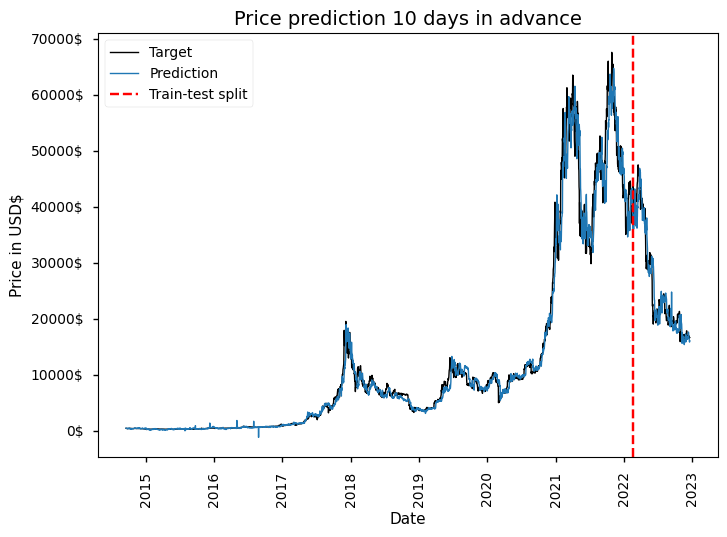

In [19]:
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target, train_pred, validation_target, y_pred, 10)
fig.show()

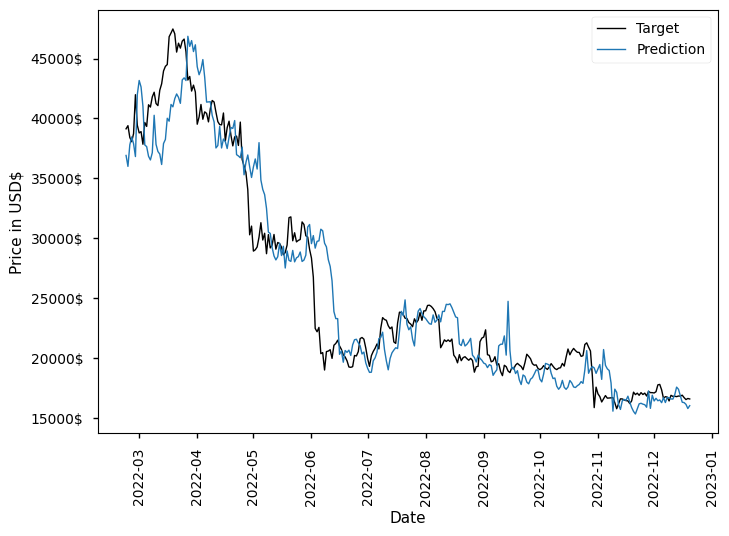

In [20]:
fig = visualizer.draw_prediction_test(validation_target, y_pred, 10)
fig.show()